In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from torch.autograd import Variable

In [ ]:
dff = pd.read_csv('drive/MyDrive/Datasets/EVChargingDemand/Demand.csv')
dff

,ObjectId2,Station_Name,Address,City,State_Province,Zip_Postal_Code,Start_Date___Time,Start_Time_Zone,End_Date___Time,End_Time_Zone,Total_Duration__hh_mm_ss_,Charging_Time__hh_mm_ss_,Energy__kWh_,GHG_Savings__kg_,Gasoline_Savings__gallons_,Port_Type,ObjectID
0,1,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/1/2018 17:49,MDT,1/1/2018 19:52,MDT,2:03:02,2:02:44,6.504,2.732,0.816,Level 2,0
1,2,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/2/2018 8:52,MDT,1/2/2018 9:16,MDT,0:24:34,0:24:19,2.481,1.042,0.311,Level 2,1
2,3,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/2/2018 21:11,MDT,1/3/2018 6:23,MDT,9:12:21,3:40:52,15.046,6.319,1.888,Level 2,2
3,4,BOULDER / ALPINE ST1,1275 Alpine Ave,Boulder,Colorado,80304,1/3/2018 9:19,MDT,1/3/2018 11:14,MDT,1:54:51,1:54:29,6.947,2.918,0.872,Level 2,3
4,5,BOULDER / BASELINE ST1,900 Baseline Rd,Boulder,Colorado,80302,1/3/2018 14:13,MDT,1/3/2018 14:30,MDT,0:16:58,0:16:44,1.800,0.756,0.226,Level 2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148131,148132,BOULDER / N BOULDER REC 1,3172 Broadway,Boulder,Colorado,80304,11/30/2023 19:58,MST,11/30/2023 20:10,MST,0:12:13,0:11:42,1.194,0.848,0.150,Level 2,77937
148132,148133,BOULDER / CARPENTER PARK1,1505 30th St,Boulder,Colorado,80303,11/30/2023 20:00,MST,11/30/2023 20:01,MST,0:01:07,0:00:00,0.000,0.000,0.000,Level 2,77938
148133,148134,BOULDER / CARPENTER PARK1,1505 30th St,Boulder,Colorado,80303,11/30/2023 20:01,MST,11/30/2023 20:21,MST,0:19:52,0:19:43,1.899,1.349,0.238,Level 2,77939
148134,148135,BOULDER / REC CENTER ST2,1360 Gillaspie Dr,Boulder,Colorado,80305,11/30/2023 21:03,MST,11/30/2023 21:31,MST,0:28:08,0:27:50,1.499,1.064,0.188,Level 2,77940


In [ ]:
# dff.head()
dff["Start_Date"] = pd.to_datetime(dff['Start_Date___Time'], format='mixed')
dff['Charging_Time(h)'] = pd.to_timedelta(dff["Charging_Time__hh_mm_ss_"]) / np.timedelta64(1, 'h')
dff['dayOfWeek'] = dff['Start_Date'].dt.day_name()
dff['Profile'] = dff['Energy__kWh_'] / dff['Charging_Time(h)']
dff.head()

,ObjectId2,Station_Name,Address,City,State_Province,Zip_Postal_Code,Start_Date___Time,Start_Time_Zone,End_Date___Time,End_Time_Zone,...,Charging_Time__hh_mm_ss_,Energy__kWh_,GHG_Savings__kg_,Gasoline_Savings__gallons_,Port_Type,ObjectID,Start_Date,Charging_Time(h),dayOfWeek,Profile
0,1,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/1/2018 17:49,MDT,1/1/2018 19:52,MDT,...,2:02:44,6.504,2.732,0.816,Level 2,0,2018-01-01 17:49:00,2.045556,Monday,3.179576
1,2,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/2/2018 8:52,MDT,1/2/2018 9:16,MDT,...,0:24:19,2.481,1.042,0.311,Level 2,1,2018-01-02 08:52:00,0.405278,Tuesday,6.121727
2,3,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/2/2018 21:11,MDT,1/3/2018 6:23,MDT,...,3:40:52,15.046,6.319,1.888,Level 2,2,2018-01-02 21:11:00,3.681111,Tuesday,4.087353
3,4,BOULDER / ALPINE ST1,1275 Alpine Ave,Boulder,Colorado,80304,1/3/2018 9:19,MDT,1/3/2018 11:14,MDT,...,1:54:29,6.947,2.918,0.872,Level 2,3,2018-01-03 09:19:00,1.908056,Wednesday,3.640879
4,5,BOULDER / BASELINE ST1,900 Baseline Rd,Boulder,Colorado,80302,1/3/2018 14:13,MDT,1/3/2018 14:30,MDT,...,0:16:44,1.800,0.756,0.226,Level 2,4,2018-01-03 14:13:00,0.278889,Wednesday,6.454183


In [ ]:
profile = dff.groupby([dff['Start_Date'].dt.date])['Profile'].sum()

In [ ]:
print(profile)

Start_Date
2018-01-01      6.359153
2018-01-02     20.418160
2018-01-03     32.616012
2018-01-04     48.338232
2018-01-05     10.555980
                 ...    
2023-11-26    230.978056
2023-11-27    317.530641
2023-11-28    331.647852
2023-11-29    312.383063
2023-11-30    307.759418
Name: Profile, Length: 2156, dtype: float64


In [ ]:
daily1 = pd.read_csv('drive/MyDrive/Datasets/EVChargingDemand/BoulderDailyData.csv')
monthly = pd.read_csv('drive/MyDrive/Datasets/EVChargingDemand/BoulderMonthlyDate.csv')

In [ ]:
daily1.interpolate(method='linear', inplace=True)
monthly.interpolate(method='linear', inplace=True)

In [ ]:
daily1["Date"] = pd.to_datetime(daily1['Date']).dt.date
monthly["Date"] = pd.to_datetime(monthly['Date']).dt.date

<ipython-input-8-b2f1ac81eb6b>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  daily1["Date"] = pd.to_datetime(daily1['Date']).dt.date


In [ ]:
monthly

,Date,MaxTemp,MinTemp,Percipitation,Snow
0,2018-01-01,51.9,23.5,0.74,8.8
1,2018-02-01,46.0,19.0,1.04,18.5
2,2018-03-01,57.9,28.8,2.23,6.8
3,2018-04-01,64.7,33.5,1.35,6.0
4,2018-05-01,73.5,45.9,4.76,0.0
...,...,...,...,...,...
67,2023-08-01,86.8,57.0,2.12,0.0
68,2023-09-01,81.1,49.6,2.32,0.0
69,2023-10-01,66.4,36.7,0.63,6.8
70,2023-11-01,58.5,30.7,0.49,7.3


In [ ]:
daily = daily1.set_index('Date')
daily

,MaxTemp,MinTemp,Percipitation,Snow
Date,,,,
2018-01-01,30,12.0,0.0,0.0
2018-01-02,46,12.0,0.0,0.0
2018-01-03,50,20.0,0.0,0.0
2018-01-04,52,24.0,0.0,0.0
2018-01-05,62,25.0,0.0,0.0
...,...,...,...,...
2023-11-26,38,12.0,0.0,0.0
2023-11-27,43,15.0,0.0,0.0
2023-11-28,53,24.0,0.0,0.0


In [ ]:
daily1['Date']

0       2018-01-01
1       2018-01-02
2       2018-01-03
3       2018-01-04
4       2018-01-05
           ...    
2155    2023-11-26
2156    2023-11-27
2157    2023-11-28
2158    2023-11-29
2159    2023-11-30
Name: Date, Length: 2160, dtype: object

In [ ]:
day = dff.groupby(dff['Start_Date'].dt.date)['dayOfWeek'].min()

In [ ]:
weekend = {'Saturday': 1, 'Sunday': 1, 'Monday': 0, 'Tuesday': 0, 'Wednesday': 0, 'Thursday': 0, 'Friday': 0}
# weekday = {'Saturday': 1, 'Sunday': 1, 'Monday': 0, 'Tuesday': 0, 'Wednesday': 0, 'Thursday': 0, 'Friday': 0}

In [ ]:
df = pd.DataFrame({'Day': day, 'Profile(kW)': profile, 'MinTemp': daily['MinTemp'], 'MaxTemp': daily['MaxTemp'], 'Percipitation': daily['Percipitation'], 'Snow': daily['Snow']})
df.dropna(inplace=True)
df['date'] = daily1['Date']
df['Weekend'] = df['Day'].apply(lambda x: weekend[x])
df.drop(columns='date', inplace=True)
df
# df.to_csv('drive/MyDrive/Datasets/EVChargingDemand/BoulderProfile.csv')

,Day,Profile(kW),MinTemp,MaxTemp,Percipitation,Snow,Weekend
2018-01-01,Monday,6.359153,12.0,30,0.0,0.0,0
2018-01-02,Tuesday,20.418160,12.0,46,0.0,0.0,0
2018-01-03,Wednesday,32.616012,20.0,50,0.0,0.0,0
2018-01-04,Thursday,48.338232,24.0,52,0.0,0.0,0
2018-01-05,Friday,10.555980,25.0,62,0.0,0.0,0
...,...,...,...,...,...,...,...
2023-11-26,Sunday,230.978056,12.0,38,0.0,0.0,1
2023-11-27,Monday,317.530641,15.0,43,0.0,0.0,0
2023-11-28,Tuesday,331.647852,24.0,53,0.0,0.0,0
2023-11-29,Wednesday,312.383063,23.0,52,0.0,0.0,0


<ipython-input-15-bbe03b557ac3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Profile(kW)', y='Day', inner='box', palette='Dark2')


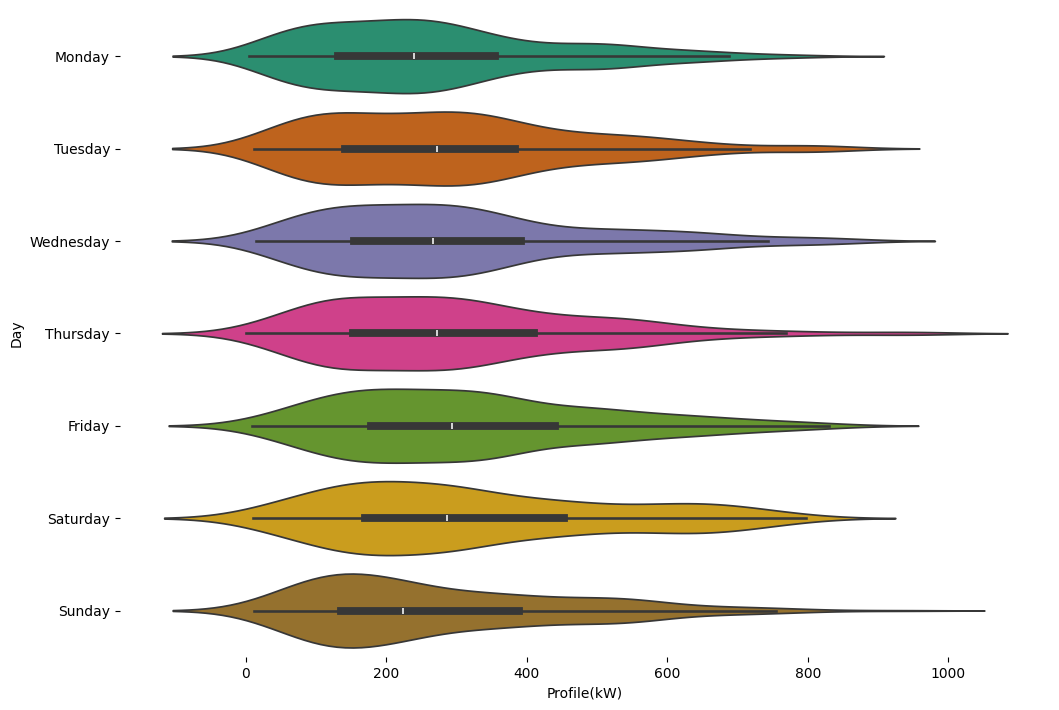

In [ ]:
# @title Day vs Profile(kW)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Day'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Profile(kW)', y='Day', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

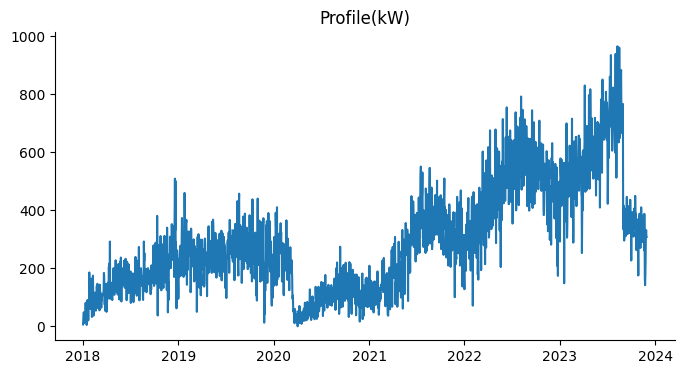

In [ ]:
# @title Profile(kW)

from matplotlib import pyplot as plt
df['Profile(kW)'].plot(kind='line', figsize=(8, 4), title='Profile(kW)')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df.drop(columns='Day', inplace=True)

In [ ]:
target = ['Profile(kW)']
features = ['Weekend', 'MaxTemp', 'MinTemp', 'Percipitation', 'Snow']

def split_train_test(df, sequence_length, test_portion, val_portion, steps_ahead):
    split = int(df.shape[0] * (1 - test_portion - val_portion))
    val_split = int(df.shape[0] * (val_portion)) + split
    # split = portion
    df_train = df.iloc[:split, :].copy()
    df_val = df.iloc[split:val_split, :].copy()
    df_test = df.iloc[val_split:, :].copy()

    # scale the data

    # train_combined = np.hstack(df_train.values).reshape(-1, 1)
    # test_combined = np.hstack(df_test.values).reshape(-1, 1)
    # val_combined = np.hstack(df_val.values).reshape(-1, 1)

    # train_scaler = MinMaxScaler().fit(train_combined)
    target_scaler = MinMaxScaler().fit(df_train[target])
    # train_scaled = train_scaler.transform(train_combined).reshape(-1, 6)
    # test_scaled = train_scaler.transform(test_combined).reshape(-1, 6)
    # val_scaled = train_scaler.transform(val_combined).reshape(-1, 6)

    # df_train = pd.DataFrame(train_scaled, columns=target+features)
    # df_test = pd.DataFrame(test_scaled, columns=target+features)
    # df_val = pd.DataFrame(val_scaled, columns=target+features)


    df_train[target] = target_scaler.transform(df_train[target])
    df_val[target] = target_scaler.transform(df_val[target])
    df_test[target] = target_scaler.transform(df_test[target])

    feature_scaler = MinMaxScaler().fit(df_train[features])
    df_train[features] = feature_scaler.transform(df_train[features])
    df_val[features] = feature_scaler.transform(df_val[features])
    df_test[features] = feature_scaler.transform(df_test[features])

    # extract the input sequences and output values

    X_train, y_train = [], []

    for i in range(sequence_length, df_train.shape[0] - steps_ahead + 1):
        X_train.append(df_train[features + target].iloc[i - sequence_length: i])
        y_train.append(df_train[target].iloc[i:i + steps_ahead])

    X_train, y_train = np.array(X_train), np.array(y_train)
    y_train.squeeze()

    X_val, y_val = [], []

    for i in range(sequence_length, df_val.shape[0] - steps_ahead + 1):
        X_val.append(df_val[features + target].iloc[i - sequence_length: i])
        y_val.append(df_val[target].iloc[i:i + steps_ahead])

    X_val, y_val = np.array(X_val), np.array(y_val)
    y_val.squeeze()

    X_test, y_test = [], []

    for i in range(sequence_length, df_test.shape[0] - steps_ahead + 1):
        X_test.append(df_test[features + target].iloc[i - sequence_length: i])
        y_test.append(df_test[target].iloc[i:i + steps_ahead])

    X_test, y_test = np.array(X_test), np.array(y_test)
    y_test.squeeze()

    print(X_train.shape)
    # (138, 30, 4)

    print(y_train.shape)
    # (55, 30, 4)

    return X_train, y_train, X_val, y_val, X_test, y_test, target_scaler

In [ ]:
window_size = 7
df_slided = df.rolling(window=window_size, min_periods=1).mean()
# df_slided = df_slided.append(df_slided.iloc[-1])
# df_slided = df_slided.append(df_slided.iloc[-1])
df_slided[6::window_size]

,Profile(kW),MinTemp,MaxTemp,Percipitation,Snow,Weekend
2018-01-07,27.677918,21.857143,50.714286,0.000000,0.000000,0.285714
2018-01-14,49.704139,28.142857,54.428571,0.001429,0.000000,0.285714
2018-01-21,46.750278,21.000000,50.285714,0.104286,1.257143,0.285714
2018-01-28,98.052694,21.142857,48.571429,0.000000,0.000000,0.285714
2018-02-04,80.588329,24.857143,54.571429,0.007143,0.114286,0.285714
...,...,...,...,...,...,...
2023-11-02,311.230478,21.571429,45.285714,0.085714,0.971429,0.285714
2023-11-09,350.464398,39.428571,67.714286,0.015714,0.000000,0.285714
2023-11-16,337.727999,33.000000,64.428571,0.000000,0.000000,0.285714
2023-11-23,307.043722,32.571429,59.714286,0.000000,0.000000,0.285714


In [ ]:
sequence_length = 35
steps_ahead = 91
batch_size = 8
X1_train, y1_train, X1_val, y1_val, X1_test, y1_test, target_scaler1 = split_train_test(df, sequence_length, 0.2, 0.1, steps_ahead)
X2_train, y2_train, X2_val, y2_val, X2_test, y2_test, target_scaler2 = split_train_test(df_slided.iloc[window_size-1::window_size], int(sequence_length / window_size), 0.2, 0.095, int(steps_ahead / window_size))

(1384, 35, 6)
(1384, 91, 1)
(200, 5, 6)
(200, 13, 1)


In [ ]:
print(y2_test[-1])

[[0.78098647]
 [0.78163999]
 [0.85285469]
 [0.81175688]
 [0.70238553]
 [0.73377477]
 [0.84986088]
 [0.74416697]
 [0.6740973 ]
 [0.76636277]
 [0.73641089]
 [0.66425141]
 [0.55313508]]


In [ ]:
X1_train = X1_train.reshape(-1, batch_size, sequence_length, len(features+target),)
X2_train = X2_train.reshape(-1, batch_size, int(sequence_length / window_size), len(features+target),)
# X1_test = X1_test.reshape(25, 17, 7, 6,)
# X2_test = X2_test.reshape(25, 17, 7, 6,)
y1_train = y1_train.reshape(-1, batch_size, steps_ahead,)
y2_train = y2_train.reshape(-1, batch_size, int(steps_ahead / window_size), )
# y1_test = y1_test.reshape(25, 17, 1)
# y2_test = y2_test.reshape(25, 17, 1)

In [ ]:
# Convert to PyTorch tensors
X1_train = torch.FloatTensor(X1_train)#.unsqueeze(-1)
X1_test = torch.FloatTensor(X1_test)#.unsqueeze(-1)
X1_val = torch.FloatTensor(X1_val)#.unsqueeze(-1)
y1_val = torch.FloatTensor(y1_val).squeeze()
y1_train = torch.FloatTensor(y1_train).squeeze()
y1_test = torch.FloatTensor(y1_test).squeeze()


# Convert to PyTorch tensors
X2_train = torch.FloatTensor(X2_train)#.unsqueeze(-1)
X2_test = torch.FloatTensor(X2_test)#.unsqueeze(-1)
X2_val = torch.FloatTensor(X2_val)#.unsqueeze(-1)
y2_val = torch.FloatTensor(y2_val).squeeze()
y2_train = torch.FloatTensor(y2_train)
y2_test = torch.FloatTensor(y2_test).squeeze()
print(y1_test.shape)

torch.Size([307, 91])


In [ ]:
print(y2_train.shape)

torch.Size([25, 8, 13])


# Noisy RNN

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

from copy import deepcopy

def gaussian_init_(n_units, std=1):
    sampler = torch.distributions.Normal(torch.Tensor([0]), torch.Tensor([std/n_units]))
    A_init = sampler.sample((n_units, n_units))[..., 0]
    return A_init

class NRNNModel(nn.Module):
    def __init__(self, input_dim, output_classes, n_units=128, eps=0.01,
                 beta=0.8, gamma_A=0.01, gamma_W=0.01, init_std=1, alpha=1,
                 solver='noisy', add_noise=0.05, mult_noise=0.02):
        super(NRNNModel, self).__init__()

        # self.device = get_device()


        self.n_units = n_units
        self.eps = eps
        self.solver = solver
        self.beta = beta
        self.alpha = alpha
        self.gamma_A = gamma_A
        self.gamma_W = gamma_W
        self.add_noise = add_noise
        self.mult_noise = mult_noise

        self.tanh = nn.Tanh()

        self.E = nn.Linear(input_dim, n_units)
        self.D = nn.Linear(n_units, output_classes)

        self.C = nn.Parameter(gaussian_init_(n_units, std=init_std))
        self.B = nn.Parameter(gaussian_init_(n_units, std=init_std))
        self.I = torch.eye(n_units)#.to(self.device)

        self.d = nn.Parameter(torch.rand(self.n_units).float() + eps)#.to(self.device)*0 + eps)


    def forward(self, x, mode='train'):
        T = x.shape[1]
        h = torch.zeros(x.shape[0], self.n_units)#.to(which_device(self))

        for i in range(T):
            z = self.E(x[:,i,:])

            if i == 0:
                A = self.beta * (self.B - self.B.transpose(1, 0)) + (1-self.beta) * (self.B + self.B.transpose(1, 0)) - self.gamma_A * self.I
                W = self.beta * (self.C - self.C.transpose(1, 0)) + (1-self.beta) * (self.C + self.C.transpose(1, 0)) - self.gamma_W * self.I


            add_noise = 0.0
            mult_noise = 1.0
            if mode == 'train':
                if self.add_noise > 0:
                    add_noise = self.add_noise * torch.randn(h.shape[0], h.shape[1]).float()#.to(self.device)

                if self.mult_noise > 0:
                    #mult_noise = self.mult_noise * torch.randn(h.shape[0], h.shape[1]).float().to(self.device) + 1
                    mult_noise = self.mult_noise * torch.rand(h.shape[0], h.shape[1]).float() + (1-self.mult_noise)#.to(self.device) + (1-self.mult_noise)


            if self.solver == 'base':
                h_update = self.alpha * torch.matmul(h, A) + self.tanh(torch.matmul(h, W) + z)
                h = h + self.eps * h_update
            elif self.solver == 'noisy':
                h_update = self.alpha * torch.matmul(h, A) + self.tanh(torch.matmul(h, W) + z)
                h = h + self.d * mult_noise * h_update + add_noise


        # Decoder
        #----------
        out = self.D(h)
        return out


In [ ]:
input_dim = len(features+target)  # Number of features
hidden_dim = 128  # Number of hidden layers
num_layers = 2  # Number of RNN layers
output_dim = steps_ahead  # Number of output layers

model1 = NRNNModel(input_dim, output_dim, n_units=hidden_dim, add_noise=0.01, mult_noise=0.02)
model2 = NRNNModel(input_dim, int(output_dim / window_size), n_units=hidden_dim, add_noise=0.01, mult_noise=0.02)

In [ ]:
### Visualization
import matplotlib.pyplot as plt
epoch_loss1 = []
epoch_loss2 = []
criterion = torch.nn.MSELoss()
optimizer1 = torch.optim.Adam(model1.parameters(), lr=0.001)
optimizer2 = torch.optim.Adam(model2.parameters(), lr=0.001)

In [ ]:
# Training loop
best_val_loss = float('inf')
patience = 20  # Number of epochs to wait before early stopping
counter = 0  # Counter for the number of epochs since the last improvement
best_model1_path = 'best_model1.pth'

num_epochs = 100
for epoch in range(num_epochs + 1):
    for batch in range(X1_train.shape[0]):
        model1.train()
        # model2.train()
        optimizer1.zero_grad()
        # optimizer2.zero_grad()
        outputs1 = model1(X1_train[batch])
        # outputs2 = model2(X2_train[batch])
        loss1 = criterion(outputs1, y1_train[batch])#.unsqueeze(-1))
        # loss2 = criterion(outputs2, y2_train[batch])#.unsqueeze(-1))
        loss1.backward()
        optimizer1.step()
        # loss2.backward()
        # optimizer2.step()
    epoch_loss1.append(loss1.item())

    model1.eval()
    with torch.no_grad():
        val_loss = criterion(model1(X1_val), y1_val)

    # Check for early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        counter = 0
        torch.save(model1.state_dict(), best_model1_path)
    # else:
    #     counter += 1
    #     if counter >= patience:
    #         print(f'Early stopping after {epoch+1} epochs.')
    #         break

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss1.item():.4f}, Val Loss: {val_loss.item():.4f}')

    # epoch_loss2.append(loss2.item())
    # if epoch % 10 == 0:
    #     print(f'Epoch {epoch}, Loss1: {loss1.item()}')#, Loss2: {loss2.item()}')


Epoch [10/100], Train Loss: 0.0247, Val Loss: 0.2688
Epoch [20/100], Train Loss: 0.0253, Val Loss: 0.2721
Epoch [30/100], Train Loss: 0.0241, Val Loss: 0.2461
Epoch [40/100], Train Loss: 0.0255, Val Loss: 0.2564
Epoch [50/100], Train Loss: 0.0273, Val Loss: 0.2553
Epoch [60/100], Train Loss: 0.0227, Val Loss: 0.2226
Epoch [70/100], Train Loss: 0.0254, Val Loss: 0.2303
Epoch [80/100], Train Loss: 0.0239, Val Loss: 0.2206
Epoch [90/100], Train Loss: 0.0239, Val Loss: 0.1664
Epoch [100/100], Train Loss: 0.0225, Val Loss: 0.2242


In [ ]:
# Training loop
best_val_loss = float('inf')
patience = 20  # Number of epochs to wait before early stopping
counter = 0  # Counter for the number of epochs since the last improvement
best_model2_path = 'best_model2.pth'

num_epochs = 100
for epoch in range(num_epochs + 1):
    for batch in range(X2_train.shape[0]):
        model2.train()
        # model2.train()
        optimizer2.zero_grad()
        # optimizer2.zero_grad()
        outputs2 = model2(X2_train[batch])
        # outputs2 = model2(X2_train[batch])
        loss2 = criterion(outputs2, y2_train[batch])#.unsqueeze(-2))
        # loss2 = criterion(outputs2, y2_train[batch])#.unsqueeze(-2))
        loss2.backward()
        optimizer2.step()
        # loss2.backward()
        # optimizer2.step()
    epoch_loss2.append(loss2.item())

    model2.eval()
    with torch.no_grad():
        val_loss = criterion(model2(X2_val), y2_val)

    # Check for early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        counter = 0
        torch.save(model2.state_dict(), best_model2_path)
    # else:
    #     counter += 1
    #     if counter >= patience:
    #         print(f'Early stopping after {epoch+1} epochs.')
    #         break

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss2.item():.4f}, Val Loss: {val_loss.item():.4f}')

    # epoch_loss2.append(loss2.item())
    # if epoch % 10 == 0:
    #     print(f'Epoch {epoch}, Loss1: {loss1.item()}')#, Loss2: {loss2.item()}')


Epoch [10/100], Train Loss: 0.0323, Val Loss: 0.2933
Epoch [20/100], Train Loss: 0.0217, Val Loss: 0.1882
Epoch [30/100], Train Loss: 0.0195, Val Loss: 0.2063
Epoch [40/100], Train Loss: 0.0176, Val Loss: 0.1874
Epoch [50/100], Train Loss: 0.0166, Val Loss: 0.1796
Epoch [60/100], Train Loss: 0.0164, Val Loss: 0.1659
Epoch [70/100], Train Loss: 0.0156, Val Loss: 0.1568
Epoch [80/100], Train Loss: 0.0167, Val Loss: 0.1562
Epoch [90/100], Train Loss: 0.0166, Val Loss: 0.1502
Epoch [100/100], Train Loss: 0.0178, Val Loss: 0.1413


In [ ]:
def sliding_window(data, window_size):
    slided_data = []
    for i in range(len(data)):
        if i < window_size - 1:
            slided_data.append(data[i])
        else:
            slided = np.average(data[i - window_size + 1:i+1])
            slided_data.append(slided)
    return slided_data

e1 = sliding_window(epoch_loss1, 10)
e2 = sliding_window(epoch_loss2, 10)

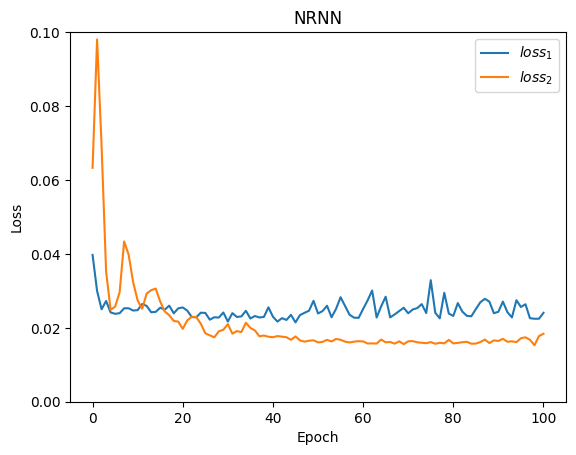

In [ ]:
plt.plot(epoch_loss1)
plt.plot(epoch_loss2)
plt.ylim(0, 0.1)
plt.legend(['$loss_1$', '$loss_2$'])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("NRNN")
plt.show()

In [ ]:
y2_test.shape

torch.Size([45, 13])

In [ ]:
model1.load_state_dict(torch.load(best_model1_path))

model1.eval()
predictions1 = model1(X1_test)
predictions1 = predictions1.data.numpy()
# predictions1 = scaler.inverse_transform(predictions1)

model2.load_state_dict(torch.load(best_model2_path))

model2.eval()
predictions2 = model2(X2_test)
predictions2 = predictions2.data.numpy()
# predictions2 = scaler.inverse_transform(predictions2)

In [ ]:
y2_test.shape

torch.Size([45, 13])

In [ ]:
predictions1.shape

(307, 91)

In [ ]:
predictions2_ = np.repeat(predictions2[1:, :], window_size, axis=1).reshape(-1, steps_ahead)
predictions1_ = predictions1[::7]
print(predictions2_.shape)
print(predictions2_[0])

(44, 91)
[1.1722486  1.1722486  1.1722486  1.1722486  1.1722486  1.1722486
 1.1722486  1.1861292  1.1861292  1.1861292  1.1861292  1.1861292
 1.1861292  1.1861292  1.1714269  1.1714269  1.1714269  1.1714269
 1.1714269  1.1714269  1.1714269  1.135644   1.135644   1.135644
 1.135644   1.135644   1.135644   1.135644   1.0861726  1.0861726
 1.0861726  1.0861726  1.0861726  1.0861726  1.0861726  1.0501634
 1.0501634  1.0501634  1.0501634  1.0501634  1.0501634  1.0501634
 0.9796704  0.9796704  0.9796704  0.9796704  0.9796704  0.9796704
 0.9796704  0.98287886 0.98287886 0.98287886 0.98287886 0.98287886
 0.98287886 0.98287886 0.8618176  0.8618176  0.8618176  0.8618176
 0.8618176  0.8618176  0.8618176  0.87911767 0.87911767 0.87911767
 0.87911767 0.87911767 0.87911767 0.87911767 0.87165725 0.87165725
 0.87165725 0.87165725 0.87165725 0.87165725 0.87165725 0.78772527
 0.78772527 0.78772527 0.78772527 0.78772527 0.78772527 0.78772527
 0.7772806  0.7772806  0.7772806  0.7772806  0.7772806  0.77728

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Assuming 'predictions' are already scaled back to the original range
# and 'y_test' is the actual values for the test set, also in the original scale
# Convert 'y_test' back to numpy if it's a tensor
y1_test_numpy = y1_test.squeeze().data.numpy()
y2_test_numpy = y2_test.squeeze().data.numpy()

y_test_numpy = y1_test_numpy[::7]


# print(y1_test.squeeze().shape)
# print(y_test_numpy.shape)
# print(predictions1)
# y_test_inverse = scaler.inverse_transform(y_test_numpy.reshape(-1, 1))

# Calculate MSE and RMSE
mse1 = mean_squared_error(y1_test_numpy, predictions1)
mae1 = mean_absolute_error(y1_test_numpy, predictions1)
rmse1 = sqrt(mse1)

print(f'Mean Absolute Error (MAE1): {mae1}')
print(f'Mean Squared Error (MSE1): {mse1}')
print(f'Root Mean Squared Error (RMSE1): {rmse1}')

mse2 = mean_squared_error(y2_test_numpy, predictions2)
mae2 = mean_absolute_error(y2_test_numpy, predictions2)
rmse2 = sqrt(mse2)

print(f'\nMean Absolute Error (MAE2): {mae2}')
print(f'Mean Squared Error (MSE2): {mse2}')
print(f'Root Mean Squared Error (RMSE2): {rmse2}')


Mean Absolute Error (MAE1): 0.38914623856544495
Mean Squared Error (MSE1): 0.21023689210414886
Root Mean Squared Error (RMSE1): 0.4585159671201744

Mean Absolute Error (MAE2): 0.36548832058906555
Mean Squared Error (MSE2): 0.18250761926174164
Root Mean Squared Error (RMSE2): 0.427209104844152


## Final Prediction

$$y_{final} = \frac{y_1 \times RMSE_0 + y_0 \times RMSE_1}{RMSE_0 + RMSE_1}$$

In [ ]:
predictions3 = (predictions2_ * rmse1 + predictions1_ * rmse2) / (rmse1 + rmse2)

mse3 = mean_squared_error(y_test_numpy, predictions3)
mae3 = mean_absolute_error(y_test_numpy, predictions3)
rmse3 = sqrt(mse3)

print(f'Mean Absolute Error (Weighted Avg): {mae3}')
print(f'Root Mean Squared Error (Weighted Avg): {rmse3}')


Mean Absolute Error (Weighted Avg): 0.28803393244743347
Root Mean Squared Error (Weighted Avg): 0.34458862224903547


$$y_{final} = \frac{y_0 + y_1}{2}$$

In [ ]:
predictions4 = (predictions2_ + predictions1_) / (2)

mse4 = mean_squared_error(y_test_numpy, predictions4)
mae4 = mean_absolute_error(y_test_numpy, predictions4)
rmse4 = sqrt(mse4)

print(f'Mean Absolute Error (Weighted Avg): {mae4}')
print(f'Root Mean Squared Error (Avg): {rmse4}')


Mean Absolute Error (Weighted Avg): 0.2902357280254364
Root Mean Squared Error (Avg): 0.3466417641112668


### Gradient Descent

In [ ]:
epoch_loss = []

def gradient_descent(y_1, y_2, y_true, alpha_init, beta_init, learning_rate, iterations):
    best_val_loss = float('inf')
    patience = 100000  # Number of epochs to wait before early stopping
    counter = 0

    alpha = alpha_init
    beta = beta_init
    m = len(y_true)

    for i in range(iterations):
        y_pred = alpha * y_1 + beta * y_2
        error = (y_pred - y_true)#.reshape(-1)

        alpha_gradient = (2/m) * np.sum(np.multiply(error, y_1), axis=0)
        beta_gradient = (2/m) * np.sum(np.multiply(error, y_2), axis=0)



        alpha -= learning_rate * alpha_gradient
        beta -= learning_rate * beta_gradient

        # print(alpha.shape)

        for j in range(len(alpha)):
            if (alpha[j] <= 0 or alpha[j] >= 1):
                alpha[j] += learning_rate * alpha_gradient[j]
        for j in range(len(beta)):
            if (beta[j] <= 0 or beta[j] >= 1):
                beta[j] += learning_rate * beta_gradient[j]
        # if(alpha.any() <= 0 or alpha.any() >= 1):
        #     alpha = 1e-2
        # if(beta.any() <= 0 or beta.any() >= 1):
        #     beta = 1e-2
        mse = mean_squared_error(y_true, y_pred)
        rmse = sqrt(mse)
        epoch_loss.append(rmse)
        mae = mean_absolute_error(y_true, y_pred)

        if rmse < best_val_loss:
            best_val_loss = rmse
            counter = 0
        else:
            counter += 1
            if counter >= patience:
                print(f'Early stopping after {i+1} epochs.')
                break

        if i % 100000 == 0:
            # print(alpha, beta)
            print(f"Iteration {i}, MAE: {mae}, RMSE: {rmse}")

    return mae, rmse

In [ ]:
alpha_init = 0.5
beta_init = 0.5
learning_rate = 0.001
iterations = 1000000

mae, rmse = gradient_descent(predictions1_, predictions2_, y_test_numpy, alpha_init, beta_init, learning_rate, iterations)
print(f"MAE: {mae}, RMSE: {rmse}")

Iteration 0, MAE: 0.2902357280254364, RMSE: 0.3466417641112668
Iteration 100000, MAE: 0.23973073065280914, RMSE: 0.30029228644564887
Iteration 200000, MAE: 0.23976267874240875, RMSE: 0.30016538809628085
Iteration 300000, MAE: 0.23977573215961456, RMSE: 0.30014536882065673
Iteration 400000, MAE: 0.23978176712989807, RMSE: 0.3001396097736703
Iteration 500000, MAE: 0.23978568613529205, RMSE: 0.30013773557721957
Iteration 600000, MAE: 0.23978649079799652, RMSE: 0.30013717703958986


KeyboardInterrupt: 

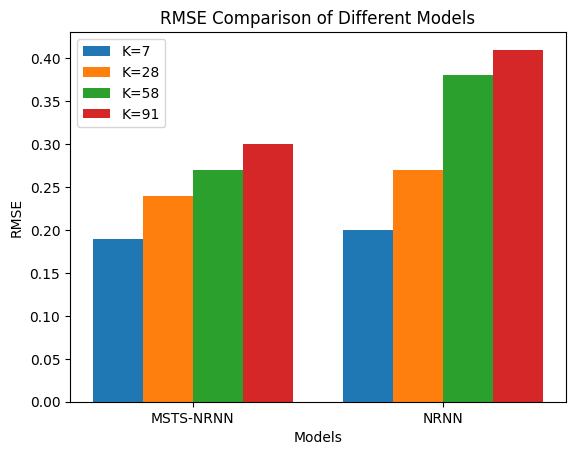

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ['MSTS-NRNN', 'NRNN']
k_values = ['K=7', 'K=28', 'K=58', 'K=91']
rmse_values = {
    'MSTS-NRNN': [0.19, 0.24, 0.27, 0.3],
    'NRNN': [0.20, 0.27, 0.38, 0.41]
}

# Number of categories
n_categories = len(categories)
n_k_values = len(k_values)

# Positions of the bars on the x-axis
bar_width = 0.2
bar_positions = np.arange(n_categories)

# Create the bar plot
fig, ax = plt.subplots()

for i, k in enumerate(k_values):
    values = [rmse_values[cat][i] for cat in categories]
    ax.bar(bar_positions + i * bar_width, values, bar_width, label=k)

# Adding labels
ax.set_xlabel('Models')
ax.set_ylabel('RMSE')
ax.set_title('RMSE Comparison of Different Models')
ax.set_xticks(bar_positions + bar_width * (n_k_values / 2 - 0.5))
ax.set_xticklabels(categories)
ax.legend()

plt.show()

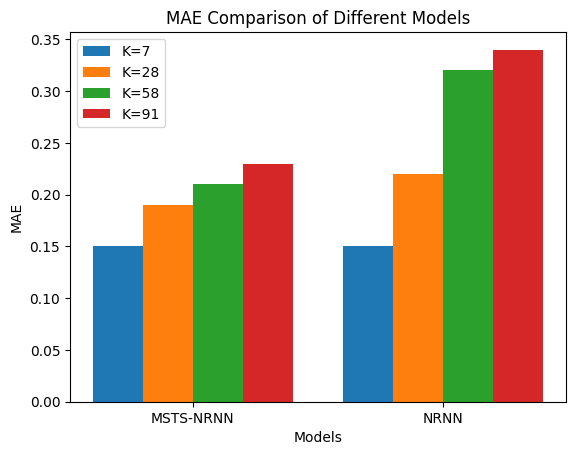

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ['MSTS-NRNN', 'NRNN']
k_values = ['K=7', 'K=28', 'K=58', 'K=91']
rmse_values = {
    'MSTS-NRNN': [0.15, 0.19, 0.21, 0.23],
    'NRNN': [0.15, 0.22, 0.32, 0.34]
}

# Number of categories
n_categories = len(categories)
n_k_values = len(k_values)

# Positions of the bars on the x-axis
bar_width = 0.2
bar_positions = np.arange(n_categories)

# Create the bar plot
fig, ax = plt.subplots()

for i, k in enumerate(k_values):
    values = [rmse_values[cat][i] for cat in categories]
    ax.bar(bar_positions + i * bar_width, values, bar_width, label=k)

# Adding labels
ax.set_xlabel('Models')
ax.set_ylabel('MAE')
ax.set_title('MAE Comparison of Different Models')
ax.set_xticks(bar_positions + bar_width * (n_k_values / 2 - 0.5))
ax.set_xticklabels(categories)
ax.legend()

plt.show()